# Control Theory Tutorial  (DRAFT, NOT APPROVED YET)
## The Cart-Pole System - Python for System Analysis

## 1. Introduction
The goal of this tutorial is to teach the usage of the programming language Python as a
tool for developing and simulating control systems. The following topics are covered:

- Derivation of the equations of motion through Lagrangian mechanics and scientific computing
- Linearization of the resulting nonlinear system equations to obtain a linear system in state space form
- Investigation of the control theoretic properties of the system (equilibria, observability, etc.)

Please refer to the [Python List-Dictionary-Tuple tutorial](http://cs231n.github.io/python-numpy-tutorial/#python-containers) and the [NumPy Array tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy)
if you are not familiar with the handling of containers and arrays in Python. If you are
completely new to Python consult the very basic introduction on [tutorialspoint](https://www.tutorialspoint.com/python/index.htm). If you don't have any experience with Jupyter Notebook to get started it is recommended to watch the following tutorial:

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('HW29067qVWk')

# 2. The Cart-Pole System
The cart-pole system, as shown in the figure is a common control theory benchmark system, and has different attributes, that make it particular interesting for teaching control theoretic principles and methods. 

The pole is attached to a cart at its end. By applying a force $F$ to the cart through a moment $M$, the cart can be moved in the $x$-direction. The objective is to control the cart, such that the pole, starting in the upright position, doesn't fall over. Another objective is the swing-up manover, where the pole starts from the downright position and has to be brought in the upright position and kept there. The second objective involves nonlinear control theory and is much harder to accomplish than the first.

![Cart-Pole System](img/cart-pole.png)

## 2.1 Derivation of the equations of motion
To derive the equations of motion, Lagrangian mechanics are used. At first the position vectors $\mathbf{p}_i$ of all $i$ rigid bodies' center of mass have to be defined (in this case $i=0,1$). Then the velocities $\dot{\mathbf{p}}_i$ are derived by differentiation. After that the kinetic energy $T$ and potential energy $V$ are described to form the Lagrangian $L$. In the last step the equations of motions are derived by Lagrange's equations of the second kind.

At first the necessary Python libraries are imported.

In [2]:
import numpy as np
import sympy as sp
from sympy import sin, cos, pi, Function
from sympy.interactive import printing
printing.init_printing()

Then symbolic expressions for all system parameters, time and force are defined.

In [3]:
t = sp.Symbol('t') # time
params = sp.symbols('m0, m1, J1, l1, a1, g, d0, d1') # system parameters
m0, m1, J1, l1, a1, g, d0, d1 = params
params_values = [(m0, 3.34), (m1, 0.3583), (J1, 0.0379999),
                 (l1, 0.5), (a1, 0.43), (g, 9.81), (d0, 0.1), (d1, 0.006588)]
# force
F = sp.Symbol('F')

The system has 2 degrees of freedom, $x_0$ and $\varphi_1$. The generelized coordinates $q_i$ are therefore:
\begin{align}
&q_0 =  x_0 &q_1 =  \varphi_1
\end{align}
Because these are time dependent, they and there derivative up to order 2 are implemented as functions.

In [4]:
q0_t = Function('q0')(t)   
dq0_t = q0_t.diff(t)
ddq0_t = q0_t.diff(t,2)
q1_t = Function('q1')(t) 
dq1_t = q1_t.diff(t)
ddq1_t = q1_t.diff(t,2)

### 2.1.1 Position vectors $\mathbf{p}_i$
The two rigid bodies of the cart-pole system are as the name suggests, the cart and the pole. The position vectors of the center of masses is found by the follwing expressions:
\begin{align}
&\mathbf{p}_0 = \begin{pmatrix} x_0 \\ 0\end{pmatrix} =\begin{pmatrix} q_0 \\ 0\end{pmatrix} & \mathbf{p}_1 = \begin{pmatrix} x_0 - a_1 \sin \varphi_1 \\ a_1 \cos \varphi_1\end{pmatrix} = \begin{pmatrix} q_0 - a_1 \sin q_1 \\ a_1 \cos q_1\end{pmatrix}
\end{align}
The position vectors are functions of the generalized coordinates.

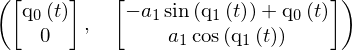

In [5]:
p0 = sp.Matrix([q0_t, 0])
p1 = sp.Matrix([q0_t - a1*sin(q1_t), a1*cos(q1_t)])
p0, p1

### 2.1.2  Velocity vectors $\dot{\mathbf{p}}_i$

The velocity vectors can be obtained by the time derivative.
\begin{align}
&\dot{\mathbf{p}}_0 = \begin{pmatrix} \dot{x}_0 \\ 0\end{pmatrix} =\begin{pmatrix} 
\dot{q}_0 \\ 0\end{pmatrix} 
& \dot{\mathbf{p}}_1 = \begin{pmatrix} \dot{x}_0 - a_1 \dot{\varphi}_1 \cos \varphi_1 
\\ - a_1 \dot{\varphi}_1 \sin \varphi_1\end{pmatrix} 
= \begin{pmatrix} \dot{q}_0 - a_1 \dot{q}_1 \cos q_1 \\ - a_1 \dot{q}_1 \sin q_1\end{pmatrix}
\end{align}

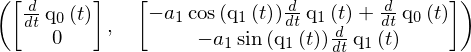

In [6]:
dp0 = p0.diff(t)
dp1 = p1.diff(t)
dp0, dp1

### 2.1.3 Kinetic energy $T$
The total kinetic energy of the system $T$ can be found by the sum of the kinetic energies $T_0$ and $T_1$ of the rigid bodies.

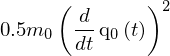

In [7]:
T0 = 0.5 * m0 * (dp0.T*dp0)[0]
T0

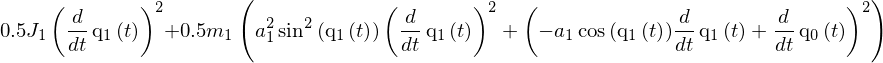

In [8]:
T1 = 0.5 * m1 * (dp1.T*dp1)[0] + 0.5 * J1 * dq1_t**2
T1

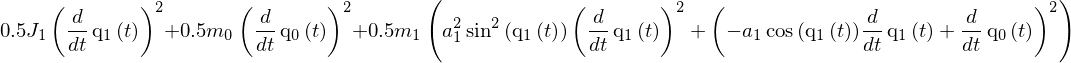

In [9]:
T = T0 + T1
T

### 2.1.3 Potential energy $V$
The total potential energy of the system $V$ can be found by the sum of the kinetic energies $V_0$ and $V_1$ of the rigid bodies. Because $V_0=0$, $V = V_1$.

In [10]:
V = m1 * g * p1[1]
V

### 2.1.4 Lagrangian $L$
The Lagrangian is defined as $L = T-V$

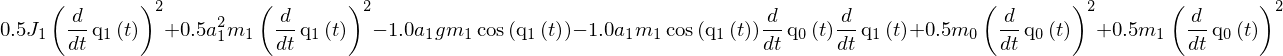

In [11]:
L = T - V
L = L.expand()
L = sp.trigsimp(L)
L

### 2.1.5 Lagrange's equation of the second kind
To obtain the equations of motion, Lagrange's equation of the second kind is used:
\begin{align}
\frac{\mathrm{d}}{\mathrm{d} t}\left(\frac{\partial L}{\partial \dot{q}_i}\right) + \frac{\partial L}{\partial q_i} = Q_i - D_i 
\quad i = 0,1\end{align}
with the generalized forces $Q_i$.
Substituting $L = T-V$ leads to:
\begin{align}
\frac{\mathrm{d}}{\mathrm{d} t}\left(\frac{\partial T}{\partial \dot{q}_i} \right) - \frac{\mathrm{d}}{\mathrm{d} t}\left(\frac{\partial V}{\partial \dot{q}_i}\right) - \frac{\partial T}{\partial q_i} + \frac{\partial V}{\partial q_i} = Q_i
\quad i = 0,1\end{align}
For mechanical systems like the cart-pole system $\frac{\mathrm{d}}{\mathrm{d} t}\frac{\partial V}{\partial \dot{q}_i} = 0$. The equation simplifies to:
\begin{align}
\frac{\mathrm{d}}{\mathrm{d} t}\left(\frac{\partial T}{\partial \dot{q}_i}\right) - \frac{\partial T}{\partial q_i} + \left(\frac{\partial V}{\partial q_i}\right) = Q_i
\quad i = 0,1 
\end{align}

The generalized forces can be seperated to a term $\mathbf{B}\mathbf{\tau}$ that expresses how the actuator forces $u$ act on the system and a term for the disspitave forces $\mathbf{R}$:
\begin{align}
(Q_0,...,Q_n)^\textrm{T} = \mathbf{B}\mathbf{\tau} - \mathbf{R}
\end{align}

For the cart-pole system one obtains: 
\begin{align}
Q_0 = F - \frac{1}{2}d_0 \dot{q}_0^2 \qquad Q_1 = - \frac{1}{2}d_1 \dot{q}_1^2 
\end{align}

In [12]:
Q0 = F - 0.5 * d0 * dq0_t**2

In [13]:
Q1 =  - 0.5 * d1 * dq1_t**2

In [14]:
Eq0 = L.diff(dq0_t,t) + L.diff(q0_t) - Q0 # = 0 

In [15]:
Eq1 = L.diff(dq1_t,t) + L.diff(q1_t) - Q1 # = 0

A mechanical system is described by the following equation:
\begin{align}
\mathbf{M}(\mathbf{q})\ddot{\mathbf{q}}+\mathbf{C}(\mathbf{q},\dot{\mathbf{q}})+\mathbf{K}(\mathbf{q},\dot{\mathbf{q}}) - \mathbf{B}(\mathbf{q})\mathbf{\tau} = \mathbf{0}
\end{align}

$\mathbf{M}$ - mass matrix

$\mathbf{C}$ - coriolis vector

$\mathbf{K}$ - vector containing potential energy terms and $\mathbf{R}$

This eqation is contained in the variable `Eq`.

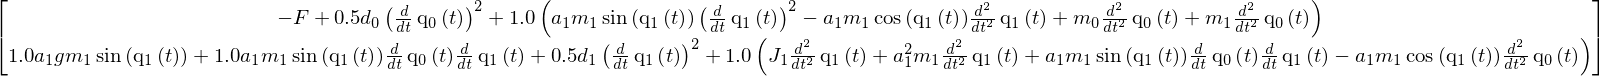

In [16]:
Eq = sp.Matrix([Eq0,Eq1])
Eq 

The mass matrix $\mathbf{M}$ can be found by applying the differential operator 
$\frac{\mathrm{d}}{\mathrm{d}\mathbf{\ddot{q}}}$ to `Eq`.

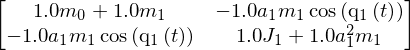

In [17]:
ddq_t = sp.Matrix([ddq0_t,ddq1_t])
M = Eq.jacobian(ddq_t)
M

The matrix is always symmetric and invertible. Therefore an equation for $\ddot{\mathbf{q}}$ always exists.
\begin{align}
\ddot{\mathbf{q}} = \mathbf{M}^{-1}(\mathbf{q})\left(-\mathbf{C}(\mathbf{q},\dot{\mathbf{q}})-\mathbf{K}(\mathbf{q},\dot{\mathbf{q}}) + \mathbf{B}(\mathbf{q})\mathbf{\tau} \right)
\end{align}

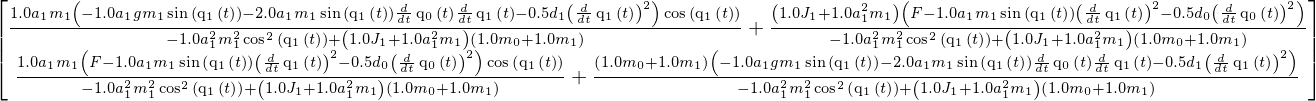

In [18]:
q_zeros = [(ddq0_t, 0), (ddq1_t, 0)]
ddq = M**-1 * -Eq.subs(q_zeros)
ddq

## 2.2 State Space Model
An affine in the control, nonlinear system is given by the following equation:
\begin{align}
\dot{\mathbf{x}}=\mathbf{f}(\mathbf{x})+\mathbf{g}(\mathbf{x})\mathbf{u} \qquad \mathbf{x} \textrm{ - state vector}, \mathbf{u} \textrm{ - control vector}
\end{align}

To transform the system equations in state space form, the system equations $\ddot{\mathbf{q}}= \mathbf{f}_{\ddot{\mathbf{q}}}(\mathbf{q},\dot{\mathbf{q}}) + \mathbf{g}_{\ddot{\mathbf{q}}}(\mathbf{q})\mathbf{\tau}$, which are second order differential equations each have to be seperated to two differential equations of first order. This is done by introducing a state vector $\mathbf{x}$ and a control vector $\mathbf{u}$.
\begin{align}
&\mathbf{x} := \begin{pmatrix} \mathbf{q} \\ \dot{\mathbf{q}} \end{pmatrix}
&\dot{\mathbf{x}} = \begin{pmatrix} \dot{\mathbf{q}} \\ \ddot{\mathbf{q}} \end{pmatrix} 
&\qquad \mathbf{u} := \mathbf{\tau}
\end{align}
Substituting $\ddot{\mathbf{q}}$, one obtains:
\begin{align}
\dot{\mathbf{x}} = \underbrace{\begin{pmatrix} \dot{\mathbf{q}} \\ \mathbf{f}_{\ddot{\mathbf{q}}}(\mathbf{q},\dot{\mathbf{q}}) \end{pmatrix}}_{=:\mathbf{f}(\mathbf{x})} + \underbrace{\begin{pmatrix} \mathbf{0} \\ \mathbf{g}_{\ddot{\mathbf{q}}}(\mathbf{q}) \end{pmatrix}}_{=:\mathbf{g}(\mathbf{x})}\underbrace{\mathbf{\tau}}_{=:\mathbf{u}}
\end{align}
The result is a control-affine system, an inhomogenous, multi-dimensional first order differential equation in $\mathbf{x}$.

### 2.2.1 Nonlinear system

In the cart-pole case, $\mathbf{q}$ is two dimensional, the state vector $\mathbf{x}$ is therefore four dimensional:
\begin{align}
\mathbf{x} = \begin{pmatrix}x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} = \begin{pmatrix}q_0 \\ q_1 \\ \dot q_0 \\ \dot q_1 \end{pmatrix}
\end{align}

In [19]:
x1_t = sp.Function('x1')(t)
x2_t = sp.Function('x2')(t)
x3_t = sp.Function('x3')(t)
x4_t = sp.Function('x4')(t)
x_t = sp.Matrix([x1_t, x2_t, x3_t, x4_t])

u_t = sp.Function('u')(t)

$q_0,q_1$ and $\dot q_0,\dot q_1$ in $\ddot{\mathbf{q}}$ are replaced by $x_1, x_2$ and $x_3, x_4$. The force $F$ is replaced by the control input $u$.

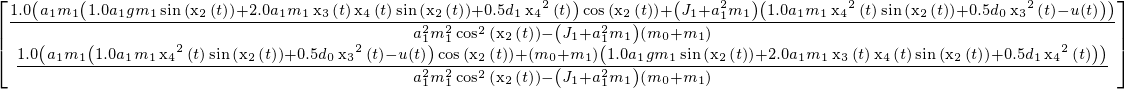

In [20]:
xu_subs = [(dq0_t, x3_t), (dq1_t, x4_t), (q0_t, x1_t), (q1_t, x2_t), (F, u_t)]
ddq = ddq.subs(xu_subs)
ddq = sp.simplify(ddq)
ddq

In [21]:
dx_t = sp.Matrix([x3_t, x4_t, ddq[0], ddq[1]])
f = dx_t.subs([(u_t, 0)])
g = (dx_t-f)/u_t

## 2.3 System Analysis
### 2.3.1 Equilibria
An equilibrium is a point in the state space, where the trajectory of the system dynamics is constant. To find such a point, $\dot{\mathbf{x}}$ is set equal to the zero vector. The result is a nonlinear equation system:
\begin{align}
\mathbf{0} = \mathbf{f}(\mathbf{x}) + \mathbf{g}(\mathbf{x})\mathbf{u}
\end{align}
The equation is dependent on the control vector $\mathbf{u}$. But for now, only the equlibria of the autonomous system $\mathbf{f}(\mathbf{x})$ are of interest, therefore $\mathbf{u}:= \mathbf{0}$.
To find the equilibria $\mathbf{x}_{0,i}(i = 1,2,...)$ of the autonoums system, the following nonlinear equation system has to be solved:
\begin{align}
\mathbf{0} = \mathbf{f}(\mathbf{x})
\end{align}

In [22]:
x0 = sp.solve(f,x_t)
x0

In [23]:
x0[1] = (x1_t, pi, 0, 0)

The result are two equilbria $\mathbf{x}_{0,1}$ and $\mathbf{x}_{0,2}$ that are independent of the state variable $x_1$, the position of the cart. The two eqilibria are the pole in the upright and downright position at zero velocity of both cart and pole, as one would intuitively guess. But the equilibria of a system can not always be simply found by intuition, like in the cart-pole case, therefore the equilibria should always be found by the shown method.

### 2.3.2 Obtaining a linear state space model
To obtain a linear state space model, a taylor expansion of the nonlinear equation is used. 
\begin{align}
\dot{\mathbf{x}}-\dot{\mathbf{x}}_{0,i} &\approx \underbrace{\mathbf{f}(\mathbf{x}_{0,i}) +\mathbf{g}(\mathbf{x}_{0,i})\mathbf{u}_0}_{=0}
+ \underbrace{\frac{\partial}{\partial \mathbf{x}}\left(\mathbf{f}(\mathbf{x}) +\mathbf{g}(\mathbf{x})\mathbf{u}\right)\Big|_{\substack{\mathbf{u} = \mathbf{u}_0 \\\mathbf{x}=\mathbf{x}_{0,i}}}}_{=:\mathbf{A}_i}(\mathbf{x}-\mathbf{x}_{0,i})
+ \underbrace{\frac{\partial}{\partial \mathbf{u}}\left(\mathbf{f}(\mathbf{x}) +\mathbf{g}(\mathbf{x})\mathbf{u}\right)\Big|_{\substack{\mathbf{u} = \mathbf{u}_0 \\\mathbf{x}=\mathbf{x}_{0,i}}}}_{=:\mathbf{B}_i}(\mathbf{u}-\mathbf{u}_0)+\mathcal{O}(2)
\end{align}
First the linearization is done for the general case. Then, specific linear system matrices at the eqilibria are evaluated.

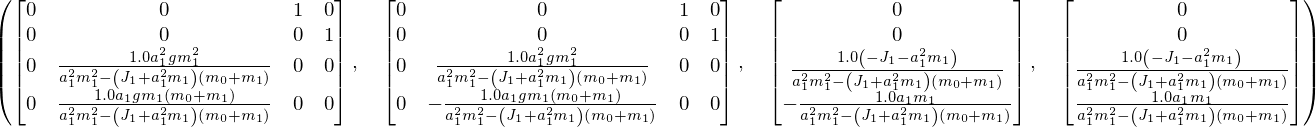

In [24]:
A = dx_t.jacobian(x_t)
B = dx_t.diff(u_t)
A1 = A.subs([(x_t[i], x0[0][i]) for i in range(0,4)]) # pole upright
B1 = B.subs([(x_t[i], x0[0][i]) for i in range(0,4)]) # pole upright
A2 = A.subs([(x_t[i], x0[1][i]) for i in range(0,4)]) # pole downright
B2 = B.subs([(x_t[i], x0[1][i]) for i in range(0,4)]) # pole upright
A1, A2, B1, B2

### 2.3.3 Stability analysis at the equilibria

An equilibrium is stable, if the system, starting from a small deviation in the state space from the eqilibrium, returns to it. If an equilibrium is stable or unstable is an important system property, that has to be analyzed. In order to analyze the equlibria, the system dynamics are linerized at these points. The result is an autonomous linear system $\dot{\mathbf{\xi}} = \mathbf{A}_i\mathbf{\xi}$. The properties of the equlibrium are encoded in the eigenvalues of the matrix $\mathbf{A}$. To compute this matrix, we calculate the jacobian of $\mathbf{f}(\mathbf{x})$ with respect to $\mathbf{x}$ at the equilibria $\mathbf{x}_{0,i}$. $i=1,2$
\begin{align}
\mathbf{A}_i = \frac{\partial \mathbf{f}(\mathbf{x})}{\partial(\mathbf{x})}\Big|_{\mathbf{x}=\mathbf{x}_{0,i}} \quad i = 1,2
\end{align}

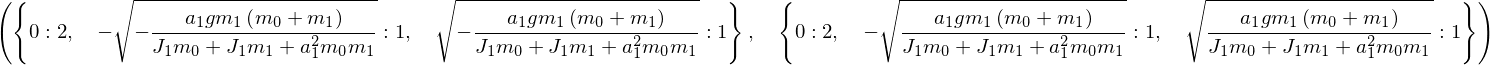

In [25]:
eigvals1 = A1.eigenvals()
eigvals2 = A2.eigenvals()
eigvals1, eigvals2

Both equilibria have two poles at $0$. The other two eigenvalues of $\mathbf{A}_1$ are conjugate complex values without real part. Due to the positive eigenvalue of $\mathbf{A}_2$, the system is unstable at $\mathbf{x}_{0,2}$.

In [26]:
eigvects1 = A1.eigenvects()
eigvects2 = A2.eigenvects()

# WORK IN PROGRESS